In [1]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('all_songs_data_with_metrics.csv')


In [2]:
# Print the column names of the dataframe
print(df.columns)


Index(['Spotify_ID', 'Title', 'Artist', 'Year', 'Genre', 'lyrics',
       'processed_lyrics', 'Degree Centrality', 'Betweenness Centrality',
       'Closeness Centrality', 'Community'],
      dtype='object')


In [3]:
def analyze_sentiment(lyrics):
    return TextBlob(lyrics).sentiment

# Apply sentiment analysis to the processed lyrics

#the emotional tone or attitude expressed in a piece of text
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)
#the polarity score indicates whether the sentiment of the lyrics is positive, negative, or neutral
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
#The subjectivity score indicates how subjective or objective the sentiment of the lyrics is
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity)


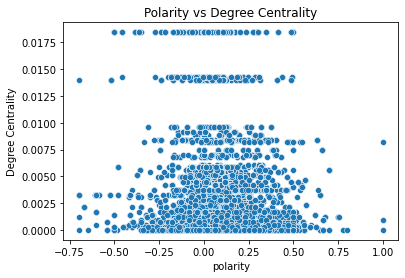

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Polarity vs Degree Centrality
sns.scatterplot(data=df, x='polarity', y='Degree Centrality')
plt.title('Polarity vs Degree Centrality')
plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
print(df.columns)


Index(['Spotify_ID', 'Title', 'Artist', 'Year', 'Genre', 'lyrics',
       'processed_lyrics', 'Degree Centrality', 'Betweenness Centrality',
       'Closeness Centrality', 'Community', 'sentiment', 'polarity',
       'subjectivity'],
      dtype='object')


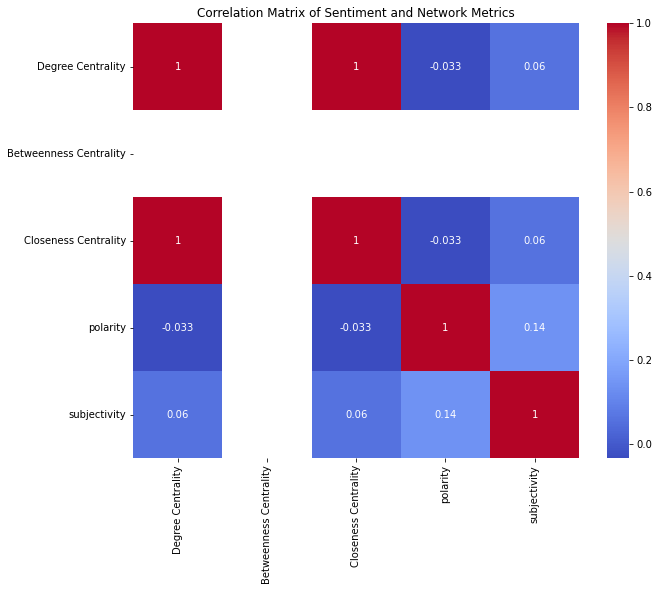

In [5]:
# Selecting relevant columns for the correlation matrix
# Include sentiment scores and network metrics columns
columns = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'polarity', 'subjectivity']
correlation_data = df[columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sentiment and Network Metrics')
plt.show()


In [6]:
import matplotlib.pyplot as plt
from math import pi

# Assuming you have some aggregate or example data for the radar chart
# Example: mean values for each metric for a particular category
categories = ['polarity', 'subjectivity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']
values = df[categories].mean().tolist()

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values += values[:1]
angles += angles[:1]


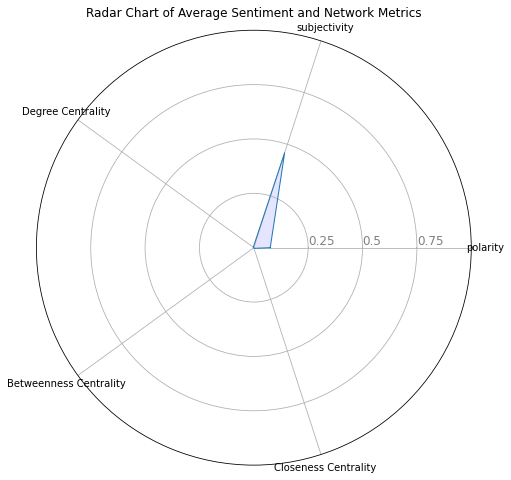

In [7]:

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=12)
plt.ylim(0, 1)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart of Average Sentiment and Network Metrics')
plt.show()


In [40]:
import plotly.express as px

# Assuming your DataFrame df has columns 'Title', 'Artist', 'polarity', and 'subjectivity'
fig = px.scatter(df, x='polarity', y='subjectivity', 
                 hover_data=['Title', 'Artist'], 
                 title='Sentiment Analysis of Songs',
                 labels={'polarity': 'Polarity', 'subjectivity': 'Subjectivity'})

# Update layout for better readability
fig.update_layout(hovermode='closest', 
                  title={'x':0.5, 'xanchor': 'center'}, 
                  xaxis_title='Polarity', 
                  yaxis_title='Subjectivity')

# Show the plot
fig.show()


In [20]:
fig.write_html('sentiment_scatterplot.html')


## Positive Songs with Lyrics

In [9]:
# Assuming df is your DataFrame with columns 'Artist', 'Title', 'polarity'

# Filter for positive songs
positive_songs = df[df['polarity'] > 0.5]

# Group by artist and select the song with the highest polarity
most_positive_song_per_artist = positive_songs.sort_values('polarity', ascending=False).drop_duplicates('Artist')

# Select the top 'X' entries
top_positive_songs = most_positive_song_per_artist


In [10]:
print(f'{top_positive_songs}')

                   Spotify_ID                                       Title  \
11361  02q0ZnV2L4XByzEvWZJqBC                                  Spring Day   
10817  6tjituizSxwSmBB5vtgHZE                       Holly Jolly Christmas   
10810  77khP2fIVhSW23NwxrRluh                     A Holly Jolly Christmas   
9564   3TSLqZssCoCdDlMhCJ08XW                                  Still Life   
7903   2pFdf2vRg9p49amXUL3ZVm                                    Melodies   
9565   5uFqjHOo3Sh0bVPCKf3DdH                                    Illusion   
2991   1X1DWw2pcNZ8zSub3uhlNz              Hall of Fame (feat. will.i.am)   
7898   0PwatPu2SZYXHCzjAfQEbe                          Yellow(good parts)   
2238   5UqCQaDshqbIk3pkhy4Pjg                         Levels - Radio Edit   
9612   1puxV64QJkmRUhhXt4T9rD                                   MER & MER   
2671   45sDIKapDyxPl307QpEAwl                                   Rocketeer   
9954   5iwz1NiezX7WWjnCgY5TH4                               Calma - Remix   

In [38]:
# Export to a new CSV file
top_positive_songs.to_csv('top_positive_song_data.csv', index=False)


## Negative Songs with Lyrics

In [25]:
# Filter for negative songs
negative_songs = df[df['polarity'] < 0]

# Group by artist and select the song with the lowest polarity (most negative)
most_negative_song_per_artist = negative_songs.sort_values('polarity', ascending=True).drop_duplicates('Artist')

# This DataFrame now contains the most negative song per artist
top_negative_songs = most_negative_song_per_artist


In [26]:
print(f'{top_negative_songs}')

                   Spotify_ID  \
9910   2TH65lNHgvLxCKXM3apjxI   
8117   6qAcApH8obo8eqatCKUHd9   
10110  2WDhYlm5gBepkMZHBk0LN7   
11531  0RE4crnT3jRms1xxVlEZx2   
6152   57kR5SniQIbsbVoIjjOUDa   
...                       ...   
1033   0KlahhzNb98zyN83Vwae0l   
9663   5NABK3lyGyk01ZP286zCCD   
11544  5JdLUE9D743ob2RtgmVpVx   
3877   5S9Zs5g9lTWnLIboN1pdlU   
8838   4vMXp7ojMU940QPQA2LXFf   

                                                   Title  \
9910                                            Callaita   
8117   Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...   
10110                                            AH YEAH   
11531                                            Bad boy   
6152                                You Know You Like It   
...                                                  ...   
1033                                           Untouched   
9663                                          Panic Room   
11544                                             Makeba   
387

In [27]:
top_negative_songs.to_csv('top_negative_song_data.csv', index=False)


### Positive Songs

In [21]:
# Select specific columns
selected_columns = ['Spotify_ID', 'Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']
new_df = df[selected_columns]

# Sort from most positive to most negative
new_df_sorted = new_df.sort_values(by='polarity', ascending=False)


In [ ]:
#unique_artists_df = new_df_sorted.drop_duplicates(subset='Artist')


In [32]:
print(new_df_sorted[['Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']].head(15))

                                Title  Year          Artist  polarity  \
11361                      Spring Day  2020             BTS   1.00000   
10810         A Holly Jolly Christmas  2019       Burl Ives   1.00000   
10817           Holly Jolly Christmas  2019   Michael Bublé   1.00000   
9564                       Still Life  2017         BIGBANG   0.80000   
7903                         Melodies  2015       Hot Shade   0.77500   
9565                         Illusion  2017           aespa   0.75625   
2988   Hall of Fame (feat. will.i.am)  2011      The Script   0.75000   
2989   Hall of Fame (feat. will.i.am)  2012      The Script   0.75000   
2990   Hall of Fame (feat. will.i.am)  2012      The Script   0.75000   
2991   Hall of Fame (feat. will.i.am)  2013      The Script   0.75000   
2246   Hall of Fame (feat. will.i.am)  2010      The Script   0.75000   
2247   Hall of Fame (feat. will.i.am)  2010      The Script   0.75000   
2234              Levels - Radio Edit  2010        

In [22]:
new_df_sorted.to_csv('topsongspositivity.csv', index=False)

### Negative Songs

In [23]:
# Select specific columns
selected_columns = ['Spotify_ID', 'Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']
alt_df = df[selected_columns]

# Sort from most negative to most positive
alt_df_sorted = alt_df.sort_values(by='polarity', ascending=True)


In [34]:
print(alt_df_sorted[['Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']].head(15))

          Title  Year     Artist  polarity  subjectivity  \
9910   Callaita  2018  Bad Bunny      -0.7      0.666667   
9911   Callaita  2019  Bad Bunny      -0.7      0.666667   
9912   Callaita  2020  Bad Bunny      -0.7      0.666667   
10399    DÁKITI  2020  Bad Bunny      -0.7      0.666667   
10402    DÁKITI  2022  Bad Bunny      -0.7      0.666667   
10398    DÁKITI  2019  Bad Bunny      -0.7      0.666667   
4597     DÁKITI  2022  Bad Bunny      -0.7      0.666667   
10397    DÁKITI  2019  Bad Bunny      -0.7      0.666667   
4596     DÁKITI  2021  Bad Bunny      -0.7      0.666667   
10400    DÁKITI  2020  Bad Bunny      -0.7      0.666667   
10401    DÁKITI  2021  Bad Bunny      -0.7      0.666667   
4595     DÁKITI  2020  Bad Bunny      -0.7      0.666667   
4594     DÁKITI  2019  Bad Bunny      -0.7      0.666667   
4593     DÁKITI  2012  Bad Bunny      -0.7      0.666667   
10396    DÁKITI  2018  Bad Bunny      -0.7      0.666667   

                                       

In [24]:
alt_df_sorted.to_csv('topsongsnegativity.csv', index=False)

### Positive Artists

In [36]:
pos_artists_df = new_df_sorted.drop_duplicates(subset='Artist')

print(pos_artists_df[['Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']].head(15))

                                Title  Year             Artist  polarity  \
11361                      Spring Day  2020                BTS  1.000000   
10810         A Holly Jolly Christmas  2019          Burl Ives  1.000000   
10817           Holly Jolly Christmas  2019      Michael Bublé  1.000000   
9564                       Still Life  2017            BIGBANG  0.800000   
7903                         Melodies  2015          Hot Shade  0.775000   
9565                         Illusion  2017              aespa  0.756250   
2988   Hall of Fame (feat. will.i.am)  2011         The Script  0.750000   
2234              Levels - Radio Edit  2010             Avicii  0.700000   
7898               Yellow(good parts)  2015     Jared Benjamin  0.700000   
9612                        MER & MER  2017              Hooja  0.700000   
2670                        Rocketeer  2010  Far East Movement  0.678836   
11387                   TOUCH MY BODY  2020            Sam Kim  0.666667   
9956        

In [37]:
pos_artists_df.to_csv('positiveartists.csv')

### Negative Artists

In [38]:
neg_artists_df = alt_df_sorted.drop_duplicates(subset='Artist')

print(neg_artists_df[['Title', 'Year', 'Artist', 'polarity', 'subjectivity', 'sentiment']].head(15))

                                                   Title  Year  \
9910                                            Callaita  2018   
8117   Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...  2015   
10110                                            AH YEAH  2018   
11531                                            Bad boy  2022   
6159                                You Know You Like It  2017   
11599                                        Bomb A Drop  2022   
9611                           FUCKED UP - Hansell Remix  2017   
11010                                             CRAZYZ  2021   
10079                                  Can't You See Me?  2018   
4216                                           un x100to  2012   
9926                                     Soltera (Remix)  2018   
8895                                I Know - PR1SVX Edit  2017   
6026                                          piano song  2021   
11011                                 Patadas de Ahogado  2019   
6722      

In [39]:
neg_artists_df.to_csv('negativeartists.csv')